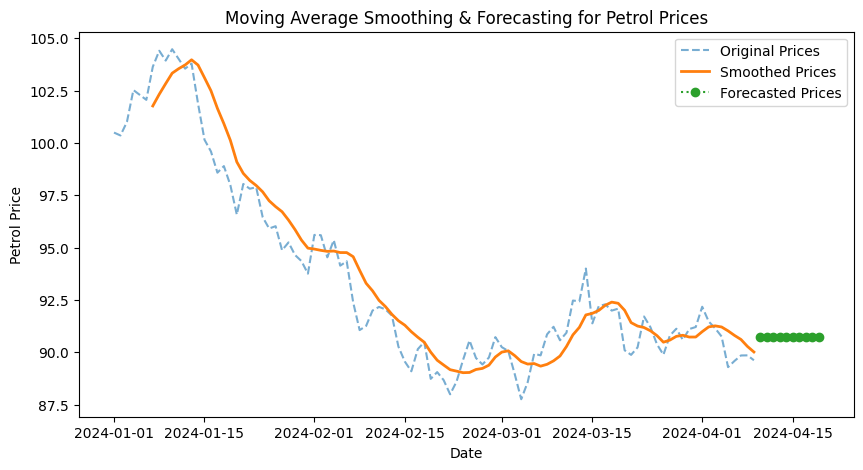

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample petrol price data (for demonstration)
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
prices = np.cumsum(np.random.randn(100)) + 100  # Simulated petrol prices

# Create DataFrame
df = pd.DataFrame({"Date": dates, "Price": prices})
df.set_index("Date", inplace=True)

# Moving Average Function
def moving_average(series, window):
    return series.rolling(window=window).mean()

# Apply Moving Average Smoothing
window_size = 7  # Weekly moving average
df["Smoothed"] = moving_average(df["Price"], window_size)

# Forecasting Future Prices using Moving Average
future_steps = 10
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq="D")
future_prices = [df["Smoothed"].iloc[-window_size:].mean()] * future_steps  # Simple extension

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Price"], label="Original Prices", linestyle="dashed", alpha=0.6)
plt.plot(df.index, df["Smoothed"], label="Smoothed Prices", linewidth=2)
plt.plot(future_dates, future_prices, label="Forecasted Prices", linestyle="dotted", marker="o")

plt.xlabel("Date")
plt.ylabel("Petrol Price")
plt.legend()
plt.title("Moving Average Smoothing & Forecasting for Petrol Prices")
plt.show()
